In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('machine-learning-course-project')
jovian.set_colab_id('16lfFpkyWJMXN7z7RwqLD_oQhYVlnBftr')

     |████████████████████████████████| 68 kB 4.8 MB/s 


# New York City Taxi Trip Duration Prediction
         ( A Machine Learning case study) 


<img src = " https://media.istockphoto.com/photos/taxi-picture-id519870714?k=20&m=519870714&s=612x612&w=0&h=vpuJQ1Uq72ebwJAXQXLPtGYDo1R0dlO_oxhgqlY9ZcQ=" />

Hi fellow reader , here is my presentation on my journey towards Machine learning case study - New York City Taxi Trip Duration Prediction.
> The challenge here is to build a model that predicts the total ride duration of taxi trips in New York City.
The data is sourced from  the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.([Source](https://www.kaggle.com/c/nyc-taxi-trip-duration)).


Here are few steps that I followed to tackle the problem :

1.   Download a real-world dataset and analyse it.
2.   Explore and visualize the data.
3.   Cleaning and feature engineering of the data.
4.   Train the First ML model on the dataset.
5.   Tune hyper-parameters and regularization.
6.   Carrying the 4 & 5 steps for the other ML models.
7.   Making predictions and observation.
8.   Saving the model.
9.   Summary and references.

Now let's get started by downloading  the essential libraries and commit to jovian ( an online platform and a wonderful repository , it's too feasible for coding , saving the work & almost serves like an amazing blog too)  .

In [ ]:
!pip install numpy pandas plotly matplotlib seaborn folium --quiet   #these libraries are for cleaning and visualisation.

In [ ]:
!pip install jovian opendatasets xgboost graphviz scikit-learn --upgrade --quiet

#The above are model related libraries(mostly except opendatasets and jovian)

     |████████████████████████████████| 173.6 MB 6.6 kB/s 
     |████████████████████████████████| 46 kB 3.0 MB/s 


In [ ]:
import jovian

In [ ]:
jovian.commit(project="Machine Learning course project")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/lalithaps036/machine-learning-course-project


'https://jovian.ai/lalithaps036/machine-learning-course-project'

# Downloading the  real-world dataset .

In [ ]:
import os
import opendatasets as od
import pandas as pd
pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 120)

In [ ]:
od.download('https://www.kaggle.com/c/nyc-taxi-trip-duration')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: lalithaps
Your Kaggle Key: ··········


100%|██████████| 85.8M/85.8M [00:01<00:00, 59.5MB/s]



Extracting archive ./nyc-taxi-trip-duration/nyc-taxi-trip-duration.zip to ./nyc-taxi-trip-duration


In [ ]:
os.listdir('nyc-taxi-trip-duration')

['test.zip', 'sample_submission.zip', 'train.zip']

In [ ]:
import zipfile
with zipfile.ZipFile("nyc-taxi-trip-duration/train.zip","r") as zip_ref: 
    zip_ref.extractall("targetdir") # Unzipping the training set.
with zipfile.ZipFile("nyc-taxi-trip-duration/test.zip","r") as zip_ref:
    zip_ref.extractall("targetdir") # Unzipping the training and validation sets.
with zipfile.ZipFile("nyc-taxi-trip-duration/sample_submission.zip","r") as zip_ref:
    zip_ref.extractall("targetdir") # Unzipping the training and validation sets.

In [ ]:
train_df = pd.read_csv('nyc-taxi-trip-duration/train.zip')
test_df = pd.read_csv('nyc-taxi-trip-duration/test.zip')
submission_df = pd.read_csv('nyc-taxi-trip-duration/sample_submission.zip')

In [ ]:
train_df

id  vendor_id      pickup_datetime     dropoff_datetime  \
0        id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1        id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2        id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3        id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4        id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   
...            ...        ...                  ...                  ...   
1458639  id2376096          2  2016-04-08 13:31:04  2016-04-08 13:44:02   
1458640  id1049543          1  2016-01-10 07:35:15  2016-01-10 07:46:10   
1458641  id2304944          2  2016-04-22 06:57:41  2016-04-22 07:10:25   
1458642  id2714485          1  2016-01-05 15:56:26  2016-01-05 16:02:39   
1458643  id1209952          1  2016-04-05 14:44:25  2016-04-05 14:47:43   

         passenger_count  pickup_longitude  pickup_latitude  \
0                      1        -73.982155        40.767937   
1                      1        -73.980415        40.738564   
2                      1        -73.979027        40.763939   
3                      1        -74.010040        40.719971   
4                      1        -73.973053        40.793209   
...                  ...               ...              ...   
1458639                4        -73.982201        40.745522   
1458640                1        -74.000946        40.747379   
1458641                1        -73.959129        40.768799   
1458642                1        -73.982079        40.749062   
1458643                1        -73.979538        40.781750   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  trip_duration  
0               -73.964630         40.765602                  N            455  
1               -73.999481         40.731152                  N            663  
2               -74.005333         40.710087                  N           2124  
3               -74.012268         40.706718                  N            429  
4               -73.972923         40.782520                  N            435  
...                    ...               ...                ...            ...  
1458639         -73.994911         40.740170                  N            778  
1458640         -73.970184         40.796547                  N            655  
1458641         -74.004433         40.707371                  N            764  
1458642         -73.974632         40.757107                  N            373  
1458643         -73.972809         40.790585                  N            198  

[1458644 rows x 11 columns]

The dataset contains 1458644 rows and 11 columns. Each row of the dataset contains information about one trip execution.

Our objective is to find a way to estimate the value in the "trip_duration" column using the values in the other columns. If we can do so for the historical data, then we should able to trip_duration for new up-going trips too, simply by asking for information like their pickup-date-time, drop-off date-time, no. of passengers & so on..



In [ ]:
test_df

id  vendor_id      pickup_datetime  passenger_count  \
0       id3004672          1  2016-06-30 23:59:58                1   
1       id3505355          1  2016-06-30 23:59:53                1   
2       id1217141          1  2016-06-30 23:59:47                1   
3       id2150126          2  2016-06-30 23:59:41                1   
4       id1598245          1  2016-06-30 23:59:33                1   
...           ...        ...                  ...              ...   
625129  id3008929          1  2016-01-01 00:02:52                1   
625130  id3700764          1  2016-01-01 00:01:52                1   
625131  id2568735          1  2016-01-01 00:01:24                2   
625132  id1384355          1  2016-01-01 00:00:28                1   
625133  id0621643          2  2016-01-01 00:00:22                2   

        pickup_longitude  pickup_latitude  dropoff_longitude  \
0             -73.988129        40.732029         -73.990173   
1             -73.964203        40.679993         -73.959808   
2             -73.997437        40.737583         -73.986160   
3             -73.956070        40.771900         -73.986427   
4             -73.970215        40.761475         -73.961510   
...                  ...              ...                ...   
625129        -74.003464        40.725105         -74.001251   
625130        -74.006363        40.743782         -73.953407   
625131        -73.972267        40.759865         -73.876602   
625132        -73.976501        40.733562         -73.854263   
625133        -73.981850        40.716881         -73.969330   

        dropoff_latitude store_and_fwd_flag  
0              40.756680                  N  
1              40.655403                  N  
2              40.729523                  N  
3              40.730469                  N  
4              40.755890                  N  
...                  ...                ...  
625129         40.733643                  N  
625130         40.782467                  N  
625131         40.748665                  N  
625132         40.891788                  N  
625133         40.769379                  N  

[625134 rows x 9 columns]

In [ ]:
submission_df

id  trip_duration
0       id3004672            959
1       id3505355            959
2       id1217141            959
3       id2150126            959
4       id1598245            959
...           ...            ...
625129  id3008929            959
625130  id3700764            959
625131  id2568735            959
625132  id1384355            959
625133  id0621643            959

[625134 rows x 2 columns]

# Data Cleansing

Let's check the data type for each column.

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


Looks like most of the columns are  alpha-numericals where majority contains numerical data such as  "vendor_id ", "passenger_count", "trip_duration"  and "pickup_longitude" , so on... None of the columns contain any missing values, which saves us a fair bit of work!


Observation : If we subtract column's , 'pickup_datetime' and 'dropoff_datetime' we get trip_duration in seconds , which indeed already calculated & present as a 'trip_duration' column( target to be predicted column) in train dataset , so we will drop column 'dropoff_datetime' 

In [ ]:
train_df.drop(columns=['dropoff_datetime'],inplace=True)

In [ ]:
train_df

id  vendor_id      pickup_datetime  passenger_count  \
0        id2875421          2  2016-03-14 17:24:55                1   
1        id2377394          1  2016-06-12 00:43:35                1   
2        id3858529          2  2016-01-19 11:35:24                1   
3        id3504673          2  2016-04-06 19:32:31                1   
4        id2181028          2  2016-03-26 13:30:55                1   
...            ...        ...                  ...              ...   
1458639  id2376096          2  2016-04-08 13:31:04                4   
1458640  id1049543          1  2016-01-10 07:35:15                1   
1458641  id2304944          2  2016-04-22 06:57:41                1   
1458642  id2714485          1  2016-01-05 15:56:26                1   
1458643  id1209952          1  2016-04-05 14:44:25                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
0              -73.982155        40.767937         -73.964630   
1              -73.980415        40.738564         -73.999481   
2              -73.979027        40.763939         -74.005333   
3              -74.010040        40.719971         -74.012268   
4              -73.973053        40.793209         -73.972923   
...                   ...              ...                ...   
1458639        -73.982201        40.745522         -73.994911   
1458640        -74.000946        40.747379         -73.970184   
1458641        -73.959129        40.768799         -74.004433   
1458642        -73.982079        40.749062         -73.974632   
1458643        -73.979538        40.781750         -73.972809   

         dropoff_latitude store_and_fwd_flag  trip_duration  
0               40.765602                  N            455  
1               40.731152                  N            663  
2               40.710087                  N           2124  
3               40.706718                  N            429  
4               40.782520                  N            435  
...                   ...                ...            ...  
1458639         40.740170                  N            778  
1458640         40.796547                  N            655  
1458641         40.707371                  N            764  
1458642         40.757107                  N            373  
1458643         40.790585                  N            198  

[1458644 rows x 10 columns]

Now that our train data set contains 10 coulumns in which the last column is our target column from which the output has to be driven and verified , we will segregate the inputs & target in the upcoming stages. 

## Training , validation and test set

A separate test set is already provided , let's use 75%-25% training-validation split.

In [ ]:
!pip install scikit-learn --upgrade --quiet

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_ready_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)

In [ ]:
print('train_df.shape :', train_ready_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (1093983, 10)
val_df.shape : (364661, 10)
test_df.shape : (625134, 9)


In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/lalithaps036/machine-learning-course-project


'https://jovian.ai/lalithaps036/machine-learning-course-project'

# Exploratory Analysis and Visualization

Here are a short discription of important columns so that it helps during the time of Analysys and visualization or if required for feature engineering as well.

---


1. **id** - a unique identifier for each trip.
2. **vendor_id** - a code indicating the provider associated with the trip record.
3. **pickup_datetime** - date and time when the meter was engaged.
4. **pickup_longitude** - the longitude where the meter was engaged.
5. **dropoff_latitude** - the latitude where the meter was disengaged.
6. **store_and_fwd_flag** - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor                             because the vehicle did not have a connection to the server - Y=store and forward; N=not a store                               and forward trip.
7. **trip_duration** - duration of the trip in seconds.

Let's explore the data by visualizing the distribution of values in some columns of the dataset, and the relationships between "trip_duration" and other columns.

We'll use libraries Matplotlib, Seaborn and Plotly for visualization.

In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The following settings will improve the default style and font sizes for our charts.

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Date

Let's visualize the pickup date more clearly by ploting a graph to see the number of years present in the data frame , so that if required if could see further whether we could split the date upon the given data. 


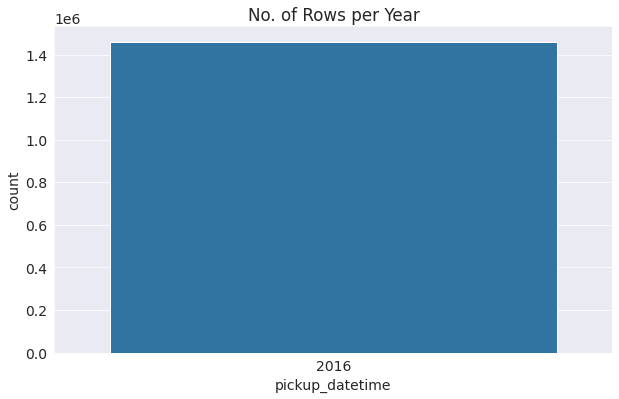

In [ ]:
plt.title('No. of Rows per Year')
sns.countplot(x=pd.to_datetime(train_df.pickup_datetime).dt.year);

Looks like the pickup year is purely of 2016 and only the dates , months & time differs for the trip duration to be predicted. Hence there is no need of splitting the column 'pickup_datetime'


Let us analyse & visualize the relationship of our target column 'trip_duration' with respect to other attributes in our train dataframe.

## Passengers

The column 'passenger_count' contains the number of passengers who were present in a particular duration of the trip as per the trip_id indication.  

In [ ]:
train_df.passenger_count.describe()

count    1.458644e+06
mean     1.664530e+00
std      1.314242e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      9.000000e+00
Name: passenger_count, dtype: float64

Passengers is a numeric column. The minimum Passengers in the dataset is 0 and the maximum age is 9. Thus, we can visualize the distribution of Passengers using a histogram with 9 bins  and a box plot. We'll use plotly to make the chart interactive, but you can create similar charts using Seaborn.

>Observation : Looks like data is quite corrupted because of the fact that number of passengers cannot be 0 in a trip.

In [ ]:
fig = px.histogram(train_df, 
                   x='passenger_count', 
                   marginal='box', 
                   nbins=15, 
                   title='Distribution of Passengers')
fig.update_layout(bargap=0.1)
fig.show()

From the above histogram , we could configure two things:

1. Noticed that only small traces of data may contain no. of passenger count = 0, which could be negligible for processing.
2. About 1 million of the passengers are solo travellers with passenger count = 1 , 210k are in pairs ( most probably couples)    and the rest of them are 24k - 78k counts

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/lalithaps036/machine-learning-course-project


'https://jovian.ai/lalithaps036/machine-learning-course-project'

## Pickup longitudes & latitudes

In [ ]:
px.scatter(train_df.sample(2000), 
           title='pickup_longitude. vs dropoff_longitude.',
           x='pickup_longitude', 
           y='dropoff_longitude', 
           color='store_and_fwd_flag')

Looks like the longitudes of the pickup and dropoff forms a cluster of points and most of them i.e., 99.50% are not stored on the server & the trip drives beyond the track of the server ( store_and_forward = 'N').

## Dropoff longitudes & latitudes

In [ ]:
px.scatter(train_df.sample(2000), 
           title='pickup_latitude. vs dropoff_latitude.',
           x='pickup_latitude', 
           y='dropoff_latitude', 
           color='store_and_fwd_flag')

Similar to the  the longitudes of the pickup and dropoff, latitude also forms a cluster of points and most of them i.e., 99.50% are not stored on the server & the trip drives beyond the track of the server ( store_and_forward = 'N').

Now let's visualize the relationship between longitude and latitude

In [ ]:
fig = px.histogram(train_df.sample(2000), 
                 x='pickup_latitude', 
                 y='pickup_longitude',  
                 hover_data=['store_and_fwd_flag'], 
                 title='Lalitude vs. Longitude')

fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/lalithaps036/machine-learning-course-project


'https://jovian.ai/lalithaps036/machine-learning-course-project'

## Correlation

Let's find whether we could find relationship between attributes of the given dataset using correlation coefficient which could be computed using .corr method in pandas series.

In [ ]:
train_df.corr()

vendor_id  passenger_count  pickup_longitude  \
vendor_id           1.000000         0.287415          0.007820   
passenger_count     0.287415         1.000000          0.002169   
pickup_longitude    0.007820         0.002169          1.000000   
pickup_latitude     0.001742        -0.005125          0.022568   
dropoff_longitude   0.001528        -0.000343          0.783582   
dropoff_latitude    0.004496        -0.002762          0.100190   
trip_duration       0.020304         0.008471          0.026542   

                   pickup_latitude  dropoff_longitude  dropoff_latitude  \
vendor_id                 0.001742           0.001528          0.004496   
passenger_count          -0.005125          -0.000343         -0.002762   
pickup_longitude          0.022568           0.783582          0.100190   
pickup_latitude           1.000000           0.114884          0.494038   
dropoff_longitude         0.114884           1.000000          0.124873   
dropoff_latitude          0.494038           0.124873          1.000000   
trip_duration            -0.029204           0.014678         -0.020677   

                   trip_duration  
vendor_id               0.020304  
passenger_count         0.008471  
pickup_longitude        0.026542  
pickup_latitude        -0.029204  
dropoff_longitude       0.014678  
dropoff_latitude       -0.020677  
trip_duration           1.000000

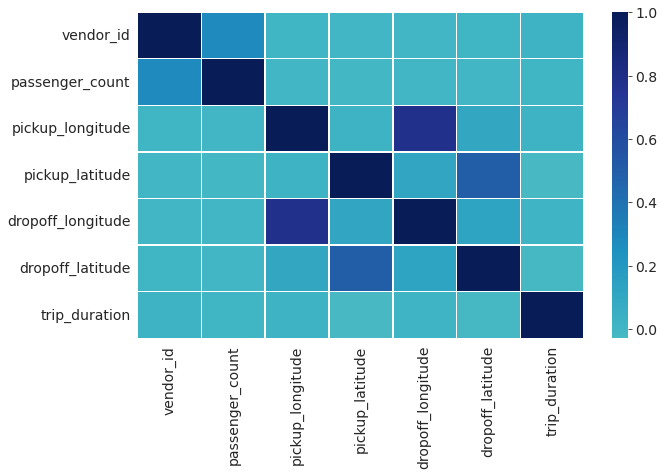

In [ ]:
ax = sns.heatmap(train_df.corr(), center=0, fmt="d",linewidths=.5,cmap="YlGnBu")

Looks like we have got strong correlation between 'vendor_id' & 'passenger_count' , dropoff_longitude & pickup_longitude , dropoff_latitude & pickup_latitude , pickup_longitude & dropoff_longitude , pickup_latitude & dropoff_latitude.

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/lalithaps036/machine-learning-course-project


'https://jovian.ai/lalithaps036/machine-learning-course-project'

## Identifying Input & target columns

Let's create a list of input columns , also create a target column.

In [ ]:
input_cols = list(train_ready_df.columns)[:-1]
target_col = 'trip_duration'

In [ ]:
print(input_cols)

['id', 'vendor_id', 'pickup_datetime', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag']


In [ ]:
print(target_col)

trip_duration


We can now create inputs and targets for the training, validation and test sets for further processing and model training.

In [ ]:
train_inputs = train_ready_df[input_cols].copy()
train_targets = train_ready_df[target_col].copy()

In [ ]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [ ]:
test_inputs = test_df[input_cols].copy()
test_targets = val_df[target_col].copy()

In [ ]:
train_inputs

id  vendor_id      pickup_datetime  passenger_count  \
1074586  id0521922          1  2016-05-12 01:43:20                1   
1033070  id3885136          1  2016-04-25 09:48:28                1   
376035   id0463847          2  2016-05-31 08:41:40                1   
1180381  id3573732          2  2016-03-09 11:37:51                1   
1130868  id3524847          1  2016-01-17 21:45:45                3   
...            ...        ...                  ...              ...   
259178   id1753868          2  2016-03-25 07:11:49                2   
1414414  id2204747          1  2016-02-16 18:01:45                1   
131932   id3043606          2  2016-01-26 19:22:29                1   
671155   id1458584          1  2016-01-19 11:53:47                1   
121958   id0357025          2  2016-02-10 22:39:31                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
1074586        -73.994102        40.744423         -73.989967   
1033070        -73.990944        40.766834         -74.003258   
376035         -73.870552        40.773609         -73.980827   
1180381        -73.958435        40.781597         -73.963631   
1130868        -73.776627        40.645306         -73.700447   
...                   ...              ...                ...   
259178         -73.955032        40.777328         -74.006203   
1414414        -73.973618        40.763920         -73.983849   
131932         -74.006195        40.734283         -73.949608   
671155         -73.962341        40.767323         -73.969757   
121958         -73.874649        40.774071         -74.004242   

         dropoff_latitude store_and_fwd_flag  
1074586         40.726486                  N  
1033070         40.738605                  N  
376035          40.759129                  N  
1180381         40.808296                  N  
1130868         40.620991                  N  
...                   ...                ...  
259178          40.749424                  N  
1414414         40.749874                  N  
131932          40.785282                  N  
671155          40.768669                  N  
121958          40.746899                  N  

[1093983 rows x 9 columns]

In [ ]:
train_targets

1074586     438
1033070    1050
376035     2769
1180381     732
1130868    1442
           ... 
259178     1281
1414414     833
131932     1285
671155      389
121958     1570
Name: trip_duration, Length: 1093983, dtype: int64

Let's also identify which of the columns are numerical and which ones are categorical. This will be useful later, as we'll need to convert the categorical data to numbers for training a various  models.

In [ ]:
!pip install numpy --quiet

In [ ]:
import numpy as np

In [ ]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [ ]:
train_inputs[numeric_cols].describe()

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count  1.093983e+06     1.093983e+06      1.093983e+06     1.093983e+06   
mean   1.535264e+00     1.663496e+00     -7.397352e+01     4.075091e+01   
std    4.987551e-01     1.312804e+00      7.809188e-02     3.360534e-02   
min    1.000000e+00     0.000000e+00     -1.219333e+02     3.435970e+01   
25%    1.000000e+00     1.000000e+00     -7.399187e+01     4.073733e+01   
50%    2.000000e+00     1.000000e+00     -7.398175e+01     4.075409e+01   
75%    2.000000e+00     2.000000e+00     -7.396735e+01     4.076833e+01   
max    2.000000e+00     9.000000e+00     -6.133553e+01     5.188108e+01   

       dropoff_longitude  dropoff_latitude  
count       1.093983e+06      1.093983e+06  
mean       -7.397345e+01      4.075178e+01  
std         7.781351e-02      3.628116e-02  
min        -1.219333e+02      3.218114e+01  
25%        -7.399133e+01      4.073584e+01  
50%        -7.397977e+01      4.075452e+01  
75%        -7.396305e+01      4.076978e+01  
max        -6.133553e+01      4.392103e+01

The ranges of the numeric columns doesn't seem reasonable. So, we may have to do some data cleaning as well.

Let's also check the number of categories in each of the categorical columns.

In [ ]:
train_inputs[categorical_cols].nunique()

id                    1093983
pickup_datetime       1049387
store_and_fwd_flag          2
dtype: int64

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/lalithaps036/machine-learning-course-project


'https://jovian.ai/lalithaps036/machine-learning-course-project'

Now let's see whether there is any requirement for furthur cleansing of data such as
1. Imputing - the process of filling missing values.
2. Scaling  - for the values of numerical data to be in range.
3. Encoding - Encode categorical columns to one-hot vectors.

### Imputing

Before getting started with imputing technique to fill missing values, first let's find whether our train sets contain missing values , if not no need to apply imputation method for the training data.

In [ ]:
train_inputs[numeric_cols].isna().sum()

vendor_id            0
passenger_count      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
dtype: int64

In [ ]:
val_inputs[numeric_cols].isna().sum()

vendor_id            0
passenger_count      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
dtype: int64

From the above observation , we can infer that there are no null values or missing data & hence no need to implement Impute technique for our train sets.

### Scaling Numeric features

Another good practice is to scale numeric features to a small range of values e.g.(0,1) or (−1,1). Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss. Optimization algorithms also work better in practice with smaller numbers.

The numeric columns in our dataset have varying ranges.

In [ ]:
train_df[numeric_cols].describe()

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count  1.458644e+06     1.458644e+06      1.458644e+06     1.458644e+06   
mean   1.534950e+00     1.664530e+00     -7.397349e+01     4.075092e+01   
std    4.987772e-01     1.314242e+00      7.090186e-02     3.288119e-02   
min    1.000000e+00     0.000000e+00     -1.219333e+02     3.435970e+01   
25%    1.000000e+00     1.000000e+00     -7.399187e+01     4.073735e+01   
50%    2.000000e+00     1.000000e+00     -7.398174e+01     4.075410e+01   
75%    2.000000e+00     2.000000e+00     -7.396733e+01     4.076836e+01   
max    2.000000e+00     9.000000e+00     -6.133553e+01     5.188108e+01   

       dropoff_longitude  dropoff_latitude  
count       1.458644e+06      1.458644e+06  
mean       -7.397342e+01      4.075180e+01  
std         7.064327e-02      3.589056e-02  
min        -1.219333e+02      3.218114e+01  
25%        -7.399133e+01      4.073588e+01  
50%        -7.397975e+01      4.075452e+01  
75%        -7.396301e+01      4.076981e+01  
max        -6.133553e+01      4.392103e+01

Let's use MinMaxScaler from sklearn.preprocessing to scale values to the (0,1) range.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

First, we fit the scaler to the data i.e. compute the range of values for each numeric column.

In [ ]:
scaler.fit(train_df[numeric_cols])

MinMaxScaler()

In [ ]:
scaler.fit(test_df[numeric_cols])

MinMaxScaler()

We can now inspect the minimum and maximum values in each column.

In [ ]:
print('Minimum:')
list(scaler.data_min_)

Minimum:


[1.0,
 0.0,
 -121.9331283569336,
 37.38958740234375,
 -121.9333267211914,
 36.601322174072266]

In [ ]:
print('Maximum:')
list(scaler.data_max_)

Maximum:


[2.0,
 9.0,
 -69.24891662597656,
 42.814937591552734,
 -67.49679565429688,
 48.85759735107422]

We can now separately scale the training, validation and test sets using the transform method of scaler.

In [ ]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

We can now verify that values in each column lie in the range (0,1)

In [ ]:
train_inputs[numeric_cols].describe()

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count  1.093983e+06     1.093983e+06      1.093983e+06     1.093983e+06   
mean   5.352643e-01     1.848329e-01      9.103222e-01     6.195584e-01   
std    4.987551e-01     1.458671e-01      1.482263e-03     6.194132e-03   
min    0.000000e+00     0.000000e+00     -4.054783e-06    -5.584694e-01   
25%    0.000000e+00     1.111111e-01      9.099738e-01     6.170558e-01   
50%    1.000000e+00     1.111111e-01      9.101660e-01     6.201440e-01   
75%    1.000000e+00     2.222222e-01      9.104394e-01     6.227694e-01   
max    1.000000e+00     1.000000e+00      1.150204e+00     2.671071e+00   

       dropoff_longitude  dropoff_latitude  
count       1.093983e+06      1.093983e+06  
mean        8.810238e-01      3.386394e-01  
std         1.429435e-03      2.960211e-03  
min         4.204563e-07     -3.606464e-01  
25%         8.806954e-01      3.373392e-01  
50%         8.809077e-01      3.388630e-01  
75%         8.812148e-01      3.401083e-01  
max         1.113183e+00      5.972211e-01

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/lalithaps036/machine-learning-course-project


'https://jovian.ai/lalithaps036/machine-learning-course-project'

### Encoding Categorical Data

Since machine learning models can only be trained with numeric data, we need to convert categorical data to numbers. A common technique is to use one-hot encoding for categorical columns.
One hot encoding involves adding a new binary (0/1) column for each unique category of a categorical column.

We are using  'LabelEncoder' because of the fact that we have huge data and have high number of unique values.

In [ ]:
from sklearn.preprocessing import LabelEncoder

First, we fit the encoder to the data i.e. identify the full list of categories across all categorical columns.

In [ ]:
encoder = LabelEncoder()

In [ ]:
train_inputs[categorical_cols]

id      pickup_datetime store_and_fwd_flag
1074586  id0521922  2016-05-12 01:43:20                  N
1033070  id3885136  2016-04-25 09:48:28                  N
376035   id0463847  2016-05-31 08:41:40                  N
1180381  id3573732  2016-03-09 11:37:51                  N
1130868  id3524847  2016-01-17 21:45:45                  N
...            ...                  ...                ...
259178   id1753868  2016-03-25 07:11:49                  N
1414414  id2204747  2016-02-16 18:01:45                  N
131932   id3043606  2016-01-26 19:22:29                  N
671155   id1458584  2016-01-19 11:53:47                  N
121958   id0357025  2016-02-10 22:39:31                  N

[1093983 rows x 3 columns]

Since encoder.fit takes single columns , & we have only 3 categorical columns , let's encode them seperately.

In [ ]:
encoder.fit(train_df['id'])
encoder.fit(train_df['pickup_datetime'])
encoder.fit(train_df['store_and_fwd_flag'])

LabelEncoder()

In [ ]:
encoder.fit(test_df['id'])
encoder.fit(test_df['pickup_datetime'])
encoder.fit(test_df['store_and_fwd_flag'])

LabelEncoder()

In [ ]:
train_df

id  vendor_id      pickup_datetime  passenger_count  \
0        id2875421          2  2016-03-14 17:24:55                1   
1        id2377394          1  2016-06-12 00:43:35                1   
2        id3858529          2  2016-01-19 11:35:24                1   
3        id3504673          2  2016-04-06 19:32:31                1   
4        id2181028          2  2016-03-26 13:30:55                1   
...            ...        ...                  ...              ...   
1458639  id2376096          2  2016-04-08 13:31:04                4   
1458640  id1049543          1  2016-01-10 07:35:15                1   
1458641  id2304944          2  2016-04-22 06:57:41                1   
1458642  id2714485          1  2016-01-05 15:56:26                1   
1458643  id1209952          1  2016-04-05 14:44:25                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
0              -73.982155        40.767937         -73.964630   
1              -73.980415        40.738564         -73.999481   
2              -73.979027        40.763939         -74.005333   
3              -74.010040        40.719971         -74.012268   
4              -73.973053        40.793209         -73.972923   
...                   ...              ...                ...   
1458639        -73.982201        40.745522         -73.994911   
1458640        -74.000946        40.747379         -73.970184   
1458641        -73.959129        40.768799         -74.004433   
1458642        -73.982079        40.749062         -73.974632   
1458643        -73.979538        40.781750         -73.972809   

         dropoff_latitude store_and_fwd_flag  trip_duration  
0               40.765602                  N            455  
1               40.731152                  N            663  
2               40.710087                  N           2124  
3               40.706718                  N            429  
4               40.782520                  N            435  
...                   ...                ...            ...  
1458639         40.740170                  N            778  
1458640         40.796547                  N            655  
1458641         40.707371                  N            764  
1458642         40.757107                  N            373  
1458643         40.790585                  N            198  

[1458644 rows x 10 columns]

In [ ]:
train_df[categorical_cols]

id      pickup_datetime store_and_fwd_flag
0        id2875421  2016-03-14 17:24:55                  N
1        id2377394  2016-06-12 00:43:35                  N
2        id3858529  2016-01-19 11:35:24                  N
3        id3504673  2016-04-06 19:32:31                  N
4        id2181028  2016-03-26 13:30:55                  N
...            ...                  ...                ...
1458639  id2376096  2016-04-08 13:31:04                  N
1458640  id1049543  2016-01-10 07:35:15                  N
1458641  id2304944  2016-04-22 06:57:41                  N
1458642  id2714485  2016-01-05 15:56:26                  N
1458643  id1209952  2016-04-05 14:44:25                  N

[1458644 rows x 3 columns]

In [ ]:
train_inputs[categorical_cols]

id      pickup_datetime store_and_fwd_flag
1074586  id0521922  2016-05-12 01:43:20                  N
1033070  id3885136  2016-04-25 09:48:28                  N
376035   id0463847  2016-05-31 08:41:40                  N
1180381  id3573732  2016-03-09 11:37:51                  N
1130868  id3524847  2016-01-17 21:45:45                  N
...            ...                  ...                ...
259178   id1753868  2016-03-25 07:11:49                  N
1414414  id2204747  2016-02-16 18:01:45                  N
131932   id3043606  2016-01-26 19:22:29                  N
671155   id1458584  2016-01-19 11:53:47                  N
121958   id0357025  2016-02-10 22:39:31                  N

[1093983 rows x 3 columns]

In [ ]:
train_inputs[categorical_cols] = train_inputs[categorical_cols].apply(LabelEncoder().fit_transform)
val_inputs[categorical_cols] = val_inputs[categorical_cols].apply(LabelEncoder().fit_transform)
test_inputs[categorical_cols] = test_inputs[categorical_cols].apply(LabelEncoder().fit_transform)

In [ ]:
train_inputs[categorical_cols]

id  pickup_datetime  store_and_fwd_flag
1074586   142480           767310                   0
1033070  1062484           668351                   0
376035    126604           876655                   0
1180381   977557           387531                   0
1130868   964185            93399                   0
...          ...              ...                 ...
259178    480389           482190                   0
1414414   603433           257743                   0
131932    832571           134722                   0
671155    399482           101071                   0
121958     97617           222657                   0

[1093983 rows x 3 columns]

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/lalithaps036/machine-learning-course-project


'https://jovian.ai/lalithaps036/machine-learning-course-project'

# Training and Validation of Models

## Model 1 : Linear Regression Model

Now let's train a simple linear Regression Model & see which models works better.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
li_model = LinearRegression()

In [ ]:
li_model.fit(train_inputs, train_targets)

LinearRegression()

In [ ]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [ ]:
linear_preds = li_model.predict(train_inputs)

In [ ]:
linear_val_preds = li_model.predict(val_inputs)

In [ ]:
print('Training set loss:',rmse(train_targets,linear_preds))
print('Validation set loss:',rmse(val_targets, linear_val_preds))

Training set loss: 5741.187259538809
Validation set loss: 3256.06913746578


As you can see the difference between train & validation sets is so minimal ( around 2k). Let's look into next model i.e, Gradient Boosting and let's see how better it is with that of Linear Regression Model.

## Model 2 : Gradient Boosting 

Importing the GBM from XGBoost.

In [ ]:
from xgboost import XGBRegressor

Assigning the regressor a variable.

In [ ]:
model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)

Let's fit the model to the training set.

In [ ]:
model.fit(train_inputs,train_targets)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=20, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

Now let's predict it on training set inputs.

In [ ]:
xgb_preds = model.predict(train_inputs)

In [ ]:
xgb_val_preds = model.predict(val_inputs)

Now let's evaluate our Gradient boosting model predictions.

In [ ]:
from sklearn.metrics import mean_squared_error

def gini_impurity(predictions, targets):
    return mean_squared_error(predictions, targets, squared=False)

In [ ]:
gini_impurity(xgb_preds, train_targets)

3900.3683059391446

In [ ]:
gini_impurity(xgb_val_preds,val_targets)

4985.380739872893

From the above observation we can infer that :

1. Linear Regression model has got the difference of about 2k with train & val sets.
2. Whereas, Gradient Boosting model has got the difference of about 1k with train & val sets.

Hence Gradient Boosting gave better result than Linear Regression model.

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/lalithaps036/machine-learning-course-project


'https://jovian.ai/lalithaps036/machine-learning-course-project'

In [ ]:
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
importance_df.head(5)

feature  importance
0                 id    0.659128
2    pickup_datetime    0.240725
4   pickup_longitude    0.065341
6  dropoff_longitude    0.021578
5    pickup_latitude    0.006333

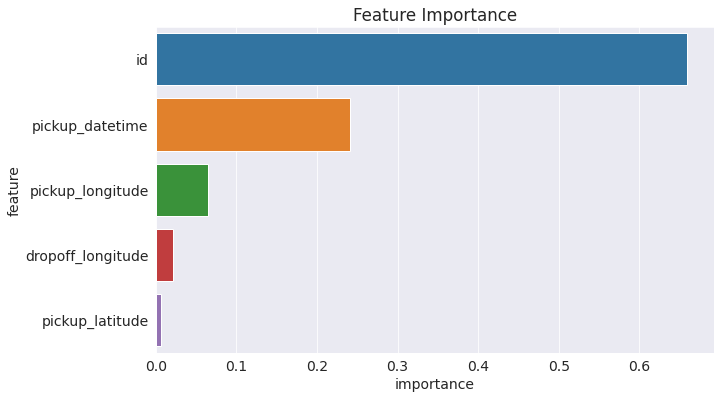

In [ ]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(5), x='importance', y='feature');

## Hyperparameter tuning and Regularization.

Let's tune the model with some hyperparameters and regularize the model in order to decrease it's rmse loss on the validation set.
**Note**: This section takes some time to execute.

In [ ]:
model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=20, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
def test_params(**params):
    model1 = XGBRegressor(random_state=42, n_jobs=-1, **params).fit(train_inputs, train_targets)
    return model1.score(train_inputs, train_targets), model1.score(val_inputs,val_targets)

In [ ]:
test_params(n_estimators=20)

(0.6458200236833377, -0.892377139060712)

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/lalithaps036/machine-learning-course-project


'https://jovian.ai/lalithaps036/machine-learning-course-project'

In [ ]:
test_params(n_estimators=30)

(0.6719268828196059, -0.975736245564756)

In [ ]:
test_params(n_estimators=100)

(0.7356495515119525, -1.2713370210209773)

In [ ]:
test_params(n_estimators=50)

(0.7044424618609688, -1.1679380257775298)

In [ ]:
test_params(n_estimators=30, max_depth=10)

(0.7599609352540577, -1.0175081696613781)

In [ ]:
test_params(n_estimators=30, max_depth=5)

(0.6494652804413517, -1.0654459763864024)

In [ ]:
test_params(n_estimators=30, max_depth=5,min_samples_split=80, min_samples_leaf=100)

[10:17:50] WARNING: ../src/learner.cc:576: 
Parameters: { "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




(0.6494652804413517, -1.0654459763864024)

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/lalithaps036/machine-learning-course-project


'https://jovian.ai/lalithaps036/machine-learning-course-project'

In [ ]:
test_params(n_estimators=50, max_depth=5,min_samples_split=80, min_samples_leaf=100)

[10:18:32] WARNING: ../src/learner.cc:576: 
Parameters: { "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




(0.6898150130367379, -1.4647273318085516)

In [ ]:
test_params(n_estimators=50, max_depth=5,min_samples_split=80, min_samples_leaf=100,max_features='log2')

[10:19:37] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




(0.6898150130367379, -1.4647273318085516)

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/lalithaps036/machine-learning-course-project


'https://jovian.ai/lalithaps036/machine-learning-course-project'

In [ ]:
test_params(n_estimators=50, max_depth=5,min_samples_split=80, min_samples_leaf=100,max_features='log2',min_impurity_decrease=1e-7)

[10:20:43] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




(0.6898150130367379, -1.4647273318085516)

In [ ]:
test_params(n_estimators=50, max_depth=5,min_samples_split=80, min_samples_leaf=100,max_features='log2',min_impurity_decrease=1e-12)

[10:21:45] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




(0.6898150130367379, -1.4647273318085516)

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/lalithaps036/machine-learning-course-project


'https://jovian.ai/lalithaps036/machine-learning-course-project'

In [ ]:
test_params(n_estimators=50, max_depth=5,min_samples_split=80, min_samples_leaf=100,max_features='log2',min_impurity_decrease=1e-5)

[10:22:53] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




(0.6898150130367379, -1.4647273318085516)

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/lalithaps036/machine-learning-course-project


'https://jovian.ai/lalithaps036/machine-learning-course-project'

In [ ]:
test_params(n_estimators=50, max_depth=5,min_samples_split=80, min_samples_leaf=100,max_features='log2',min_impurity_decrease=1e-5,learning_rate=0.400000012)

[10:23:58] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




(0.6953308232980805, -1.0405554316656889)

In [ ]:
test_params(n_estimators=50, max_depth=5,min_samples_split=80, min_samples_leaf=100,max_features='log2',min_impurity_decrease=1e-5,learning_rate=0.200000012)

[10:25:00] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




(0.647277801070671, -1.214941634399239)

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/lalithaps036/machine-learning-course-project


'https://jovian.ai/lalithaps036/machine-learning-course-project'

### Considering the best parameters together

In [ ]:
gbm_model = XGBRegressor(n_jobs=-1, random_state=42,n_estimators=50, max_depth=5,min_samples_split=80, min_samples_leaf=100,max_features='log2',min_impurity_decrease=1e-5,learning_rate=0.200000012)

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/lalithaps036/machine-learning-course-project


'https://jovian.ai/lalithaps036/machine-learning-course-project'

In [ ]:
gbm_model.fit(train_inputs,train_targets)

[10:26:09] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.200000012,
             max_delta_step=0, max_depth=5, max_features='log2',
             min_child_weight=1, min_impurity_decrease=1e-05,
             min_samples_leaf=100, min_samples_split=80, missing=nan,
             monotone_constraints='()', n_estimators=50, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', ...)

In [ ]:
gbm_preds = gbm_model.predict(train_inputs)

In [ ]:
gbm_val_preds = gbm_model.predict(val_inputs)

In [ ]:
gini_impurity(gbm_preds, train_targets)

3412.7584754383906

In [ ]:
gini_impurity(gbm_val_preds, val_targets)

4859.691783566393

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/lalithaps036/machine-learning-course-project


'https://jovian.ai/lalithaps036/machine-learning-course-project'

We can see that the after hyperparameter tuning , the gini value for train set is decreased from 3900.00 to 3412.75. 

## Model 3 : Random Forest 

Let's test with the Random Forest now.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_model = RandomForestRegressor(n_jobs=-1, random_state=42,n_estimators=50, max_depth=5,min_samples_split=80, min_samples_leaf=100,max_features='log2',min_impurity_decrease=1e-5)

In [ ]:
rf_model.fit(train_inputs, train_targets)

RandomForestRegressor(max_depth=5, max_features='log2',
                      min_impurity_decrease=1e-05, min_samples_leaf=100,
                      min_samples_split=80, n_estimators=50, n_jobs=-1,
                      random_state=42)

In [ ]:
forest_preds = rf_model.predict(train_inputs)

In [ ]:
forest_val_preds = rf_model.predict(val_inputs)

In [ ]:
gini_impurity(forest_preds, train_targets)

5714.4279917494005

In [ ]:
gini_impurity(forest_val_preds, val_targets)

3239.5725965227725

# Conclusion

Looks like random forest model didn't work well with our inputs.
Now let's conclude with the results of all models.

In [ ]:
# here is the data
loss = {
    'n_estimators' : [np.nan, 50, 50],
    'max_depth' : [np.nan, 5, 5],
    'train_loss' : [5741.187259538812, 3412.7584754383906, 5714.4279917494005],
    'val_loss' : [3256.069137465793, 4859.691783566393, 3239.5725965227725]
}
loss = pd. DataFrame(loss,index=['Linear Regression', 'GBM', 'Random Forest'])
loss

n_estimators  max_depth   train_loss     val_loss
Linear Regression           NaN        NaN  5741.187260  3256.069137
GBM                        50.0        5.0  3412.758475  4859.691784
Random Forest              50.0        5.0  5714.427992  3239.572597

Hence we could conclude that GBM with hyperparameter tuning's has got best result for our dataeset :) 

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/lalithaps036/machine-learning-course-project


'https://jovian.ai/lalithaps036/machine-learning-course-project'

## Predictions on the test set

In [ ]:
test_inputs

id  vendor_id  pickup_datetime  passenger_count  pickup_longitude  \
0       469364        0.0           610580         0.111111          0.910045   
1       547621        0.0           610579         0.111111          0.910499   
2       190107        0.0           610578         0.111111          0.909868   
3       335483        1.0           610577         0.111111          0.910653   
4       249509        0.0           610576         0.111111          0.910385   
...        ...        ...              ...              ...               ...   
625129  470064        0.0                4         0.111111          0.909754   
625130  578497        0.0                3         0.111111          0.909699   
625131  401488        0.0                2         0.222222          0.910346   
625132  216304        0.0                1         0.111111          0.910266   
625133   97656        1.0                0         0.222222          0.910164   

        pickup_latitude  dropoff_longitude  dropoff_latitude  \
0              0.616078           0.880717          0.339039   
1              0.606487           0.881274          0.330776   
2              0.617102           0.880790          0.336823   
3              0.623428           0.880785          0.336901   
4              0.621506           0.881243          0.338975   
...                 ...                ...               ...   
625129         0.614802           0.880513          0.337160   
625130         0.618245           0.881392          0.341143   
625131         0.621209           0.882803          0.338385   
625132         0.616361           0.883213          0.350063   
625133         0.613286           0.881099          0.340075   

        store_and_fwd_flag  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  
...                    ...  
625129                   0  
625130                   0  
625131                   0  
625132                   0  
625133                   0  

[625134 rows x 9 columns]

In [ ]:
test_preds = gbm_model.predict(test_inputs)

In [ ]:
test_preds

array([ 713.63654,  597.7013 ,  578.66156, ..., 1265.5259 , 1809.6178 ,
       1628.0923 ], dtype=float32)

Let's submit the result to the submission_df  

In [ ]:
submission_df['trip_duration'] = test_preds

In [ ]:
submission_df

id  trip_duration
0       id3004672     713.636536
1       id3505355     597.701294
2       id1217141     578.661560
3       id2150126    1217.809326
4       id1598245     602.203430
...           ...            ...
625129  id3008929     470.013580
625130  id3700764     866.124634
625131  id2568735    1265.525879
625132  id1384355    1809.617798
625133  id0621643    1628.092285

[625134 rows x 2 columns]

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/lalithaps036/machine-learning-course-project


'https://jovian.ai/lalithaps036/machine-learning-course-project'

We can now make the predictions on a csv file.

In [ ]:
submission_df.to_csv('submission.csv', index=None)

In [ ]:
from IPython.display import FileLink

In [ ]:
FileLink('submission.csv')

/content/submission.csv

We can now make a submission on this page and check our score: https://www.kaggle.com/c/nyc-taxi-trip-duration/submit



In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/lalithaps036/machine-learning-course-project


'https://jovian.ai/lalithaps036/machine-learning-course-project'

# Saving the model

In [ ]:
import joblib

In [ ]:
taxi_trip_duration = {
    'model': gbm_model,
    #'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols
}

In [ ]:
joblib.dump(taxi_trip_duration, 'taxi_trip_duration.joblib')

['taxi_trip_duration.joblib']

In [ ]:
jovian.commit(outputs=['taxi_trip_duration.joblib'])

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Uploading additional outputs...
Committed successfully! https://jovian.ai/lalithaps036/machine-learning-course-project


'https://jovian.ai/lalithaps036/machine-learning-course-project'

# Summary

Let's summarise the work we have done throughout the notebook:-

The following topics were covered in this tutorial:

*   Downloading a real-world dataset from a Kaggle competition.
*   Performing data cleansing and prepare the dataset for training.
*   Training and interpreting a Linear Regression model using LinearRegressor.
*   Training and interpreting a gradient boosting model using XGBoost.
*   Training and interpreting a Random Forest model using RandomForest
*   Configuring the gradient boosting model and tuning hyperparamters.
*   Comparing the model with other types of models like linear Regression and Random Forest.
*   Predicting on Testset.
*   Saving the model as a `.joblib` file.


# References and future work

Here are the sites that I referred to , during the preparation of ML model.

1. https://www.kaggle.com/c/nyc-taxi-trip-duration/overview
2. https://stackoverflow.com/questions/3451111/unzipping-files-in-python
3. https://towardsdatascience.com/how-to-encode-categorical-columns-using-python-9af10b36f049
4. https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/lesson/gradient-boosting-with-xgboost
5. https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/lesson/linear-regression-with-scikit-learn
6. https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/lesson/random-forests-and-regularization
7. https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/lesson/decision-trees-and-hyperparameters

**Future Work**

1. I used Linear Regression , GBM & Random Forest , future work may include trying the predictions with other models such as      Decision Tress, K-Fold and so on..
2. Learning & implementing the speedup mechanisms to increase the time taken to run the models with predictions.

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/lalithaps036/machine-learning-course-project


'https://jovian.ai/lalithaps036/machine-learning-course-project'